<a href="https://colab.research.google.com/github/drsennet/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network/blob/master/Fasion_images_NN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow  as tf
from tensorflow import keras


In [ ]:
keras.__version__


'2.9.0'

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
fashion_mist = keras.datasets.fashion_mnist
fashion_mist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
fashion_mist
#Train: 6,000 observation; Test: 10,000 observations
(X_train_full, y_train_full), (X_test, y_test) = fashion_mist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


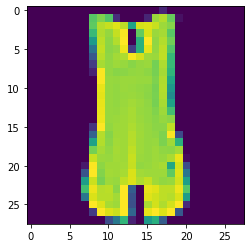

In [ ]:
plt.imshow(X_train_full[4]) #First element: image at position zero


In [ ]:
y_train_full[1] # output: veiw the category

In [ ]:
#Creating the decription of label
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[1]]

'T-shirt/top'

In [ ]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [ ]:
#3. Normalization and Test-Train Split

    #3.1 Data Normalization: 0 to 255
X_train_n = X_train_full / 255    
X_test_n = X_test / 255 

In [ ]:
 #3.2 Split the data into train/validation/test dataset
        #Train data: used for training model
        #Validation data: fo tuning the hyperparameters and
            #evaluate the model
        #Test data: to test the model after the model has 
            #gone throuh=gh initial vetting by the validation set
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#4. BUilding the model NN Using Keras
    #Sequential API: Layer by layer model
    #Functional API: Advanced structure varying use of input into layers
    
    #4.1 first structure
        #28*28 input layer
        #hidden layer 1
        #hidden layer 2
        #output layer
        #10 categories
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
    #observation:m 28*28 pixel

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


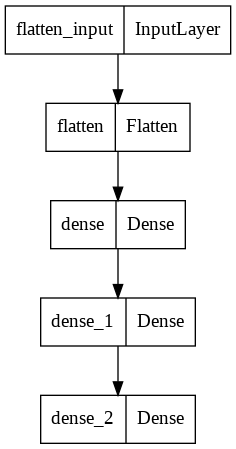

In [ ]:
    #Looking at the NN
#!pip install pydot
import pydot
keras.utils.plot_model(model)

In [ ]:
 #Accessing the parameters
weights, biases = model.layers[1].get_weights()


In [ ]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
#5. Compiling and Training the Model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer ="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=40,
                          validation_data = (X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6247 - val_accuracy: 0.9030
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6326 - val_accuracy: 0.9028
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6307 - val_accuracy: 0.9042
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6284 - val_accuracy: 0.9024
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6325 - val_accuracy: 0.9018
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6353 - val_accuracy: 0.9028
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6341 - val_ac

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 1719}

In [ ]:
model_history.history

{'loss': [0.001427075476385653,
  0.0014171757502481341,
  0.0014070497127249837,
  0.0013476352905854583,
  0.0013598413206636906,
  0.0013785181799903512,
  0.0013401171891018748,
  0.0013264681911095977,
  0.0013055294984951615,
  0.0012924396432936192,
  0.001277637667953968,
  0.0012389994226396084,
  0.0012424266897141933,
  0.001224326784722507,
  0.0012119170278310776,
  0.0012314622290432453,
  0.0011943052522838116,
  0.0011982698924839497,
  0.0011718954192474484,
  0.0011686468496918678,
  0.001148480107076466,
  0.0011449516750872135,
  0.001139851869083941,
  0.0011327554238960147,
  0.0011082903947681189,
  0.0011089026229456067,
  0.0010971375741064548,
  0.0010853414423763752,
  0.0010794379049912095,
  0.0010685132583603263,
  0.0010607043514028192,
  0.0010448795510455966,
  0.0010518227936699986,
  0.001028361963108182,
  0.0010191431501880288,
  0.0010215393267571926,
  0.0010110089788213372,
  0.0009942904580384493,
  0.0009961039759218693,
  0.0009861732833087444

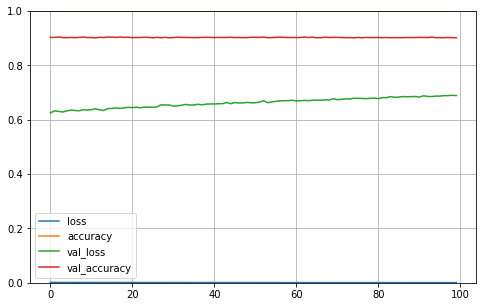

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#6. Evaluation Performance and Prediction
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7640 - accuracy: 0.8934


[0.7639839053153992, 0.8934000134468079]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 97ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new)
y_pred


1/1 [==============================] - 0s 14ms/step


array([9, 2, 1])

In [ ]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

In [ ]:
#np.array(class_names)[y_pred]
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

AxesImage(54,36;334.8x217.44)


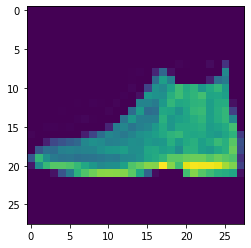

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


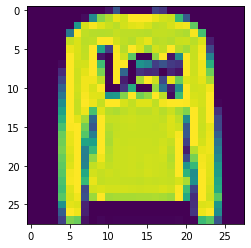

In [ ]:
print(plt.imshow(X_test[1]))

In [ ]:
print(plt.imshow(X_test[2]))

NameError: ignored